# Titanic Project

Submitted by : SINDHU SHREE N

Batch Number : 1832

In [70]:
#importing the required libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings("ignore")

# Examining the data:

In [71]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [73]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.00,0,0,111240,33.500,B19,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.00,4,2,347082,31.275,NaN,S
288,289,1,2,"Hosono, Mr. Masabumi",male,42.00,0,0,237798,13.000,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.00,4,2,347082,31.275,NaN,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.500,NaN,S


# Exploratory data analysis:

In [74]:
df.shape

(891, 12)

The dataset contains 891 rows and 12 features + the target Variable(survived).2 of the features are floats, 5 are integers and 5 are objects as listed below.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [77]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We can see that Name,Sex,Ticket,Cabin and Embarked are off object datatype.

In [78]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [79]:
#checking the null values
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


We can see that there are 'True's present in Age and Cabin columns.

Let us take a detailed look at what data is actually missing.

In [80]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So there are 177 Nan values in Age column and 687 Nan values in Cabin column.

In [81]:
print('Survival percentage for NaN Cabin passengers:',df[df['Cabin'].isnull()].loc[:,'Survived'].mean())
print('survival percentage for all passengers:',df['Survived'].mean())

Survival percentage for NaN Cabin passengers: 0.29985443959243085
survival percentage for all passengers: 0.3838383838383838


The survival of Nan passengers is only a little lower than that of the whole population. I will ignore Cabin. I will just impute Age Nan with its median values.

In [82]:
#filling the null value of Age column by its median
df['Age']=df['Age'].fillna(df['Age'].median())

In [83]:
print(df['Age'].isnull().sum())

0


Now we can see that all NAN values are filled hence it is showing zero null values in 'Age' column.

In [84]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


we can see that there is no Nan values in Age column since they are filled by median values.

In [85]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
#summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


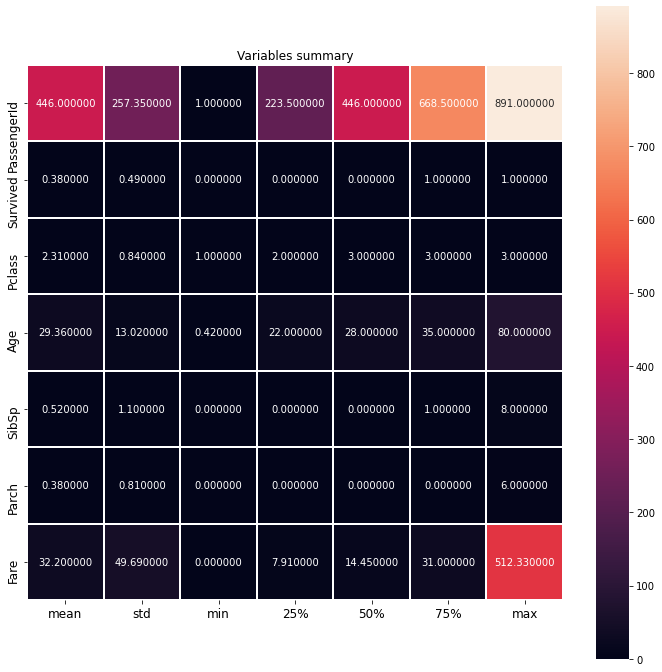

In [87]:
figure=plt.figure(figsize=(8,7))
figure.set_size_inches(12, 12)
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt="f",square=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

From the above we can determine the mean, standard deviation, minimum and maximum value of each column. It helps us further in data cleaning.

PassengerId:

    Mean=446.000000
    Std=257.353842
    min_value=1.000000
    max_value=891000000

Survived:

    Mean=0.383838
    std=0.486592
    min_value=0.000000
    max_value=1.000000

Pclass:

    Mean=2.308642
    std=0.836071
    min_value=1.000000
    max_value=3.000000

Age:

    Mean=29.361582
    std=13.019697
    min_value=0.420000
    max_value=80.00000

Sibsp:

    Mean=0.523008
    std=1.10274
    min_value=0.000000
    max_value=8.000000

Parch:

    Mean=0.381594
    std=0.806057
    min_value=0.000000
    max_value=6.000000

Fare:
     
    Mean=32.204208
    std=49.693429
    min_value=0.000000
    max_value=512.329200

Observations:
    
    1.Mean is greater than median in Pclass,Age,SibSp,Parch,Fare columns.
    2.Their is a huge difference between 75th percentile and maximum value in Fare,Age and PassengerId columns.
    3.We can see that the minimum value and median values are zeros in Parch column.
    4.The observation 1 and 2 suggests that there are extreme outliers present in Fare,Age and PassengerId columns.

In [88]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [89]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

# Univariate Analysis:

<AxesSubplot:xlabel='PassengerId', ylabel='count'>

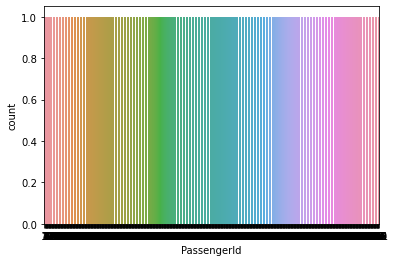

In [90]:
sns.countplot(df['PassengerId'])

Data distributed normally in all columns.

<AxesSubplot:xlabel='Survived', ylabel='count'>

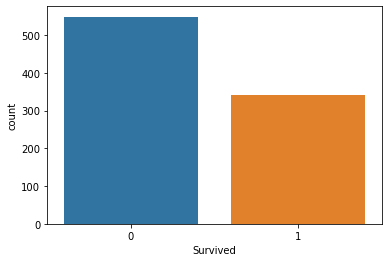

In [91]:
sns.countplot(df['Survived'])

Data is not normally distributed in all columns.

In [92]:
#calculating the survival percentage 
print(df.Survived.sum()/891*100,"%")

38.38383838383838 %


So more people died than survived(38% survived)

<AxesSubplot:xlabel='Name', ylabel='count'>

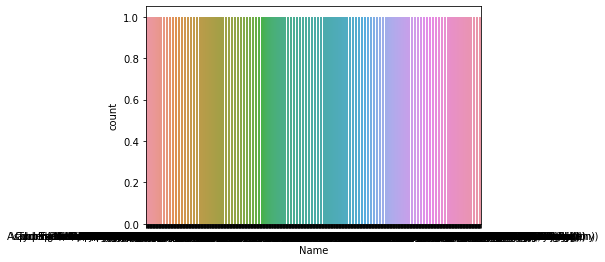

In [93]:
sns.countplot(df['Name'])

Here data is ditributed normally in all columns.

<AxesSubplot:>

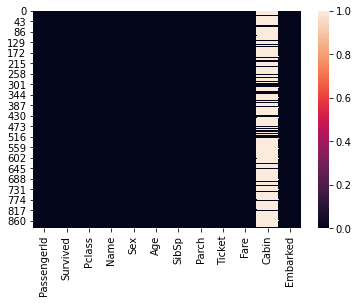

In [94]:
#plotting heatmap for null values
sns.heatmap(df.isnull())

As discussed above we can see that 'Cabin' column is having a null values.

# Bivariate Analysis:

# 1. Age and Sex:

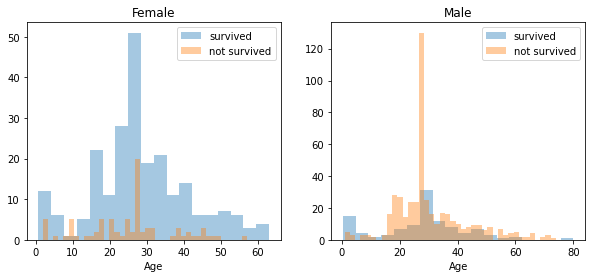

In [95]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age, bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age, bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age, bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age, bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

We can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

# 2. Survived and Sex:

Text(0.5, 1.0, 'Survived (female)')

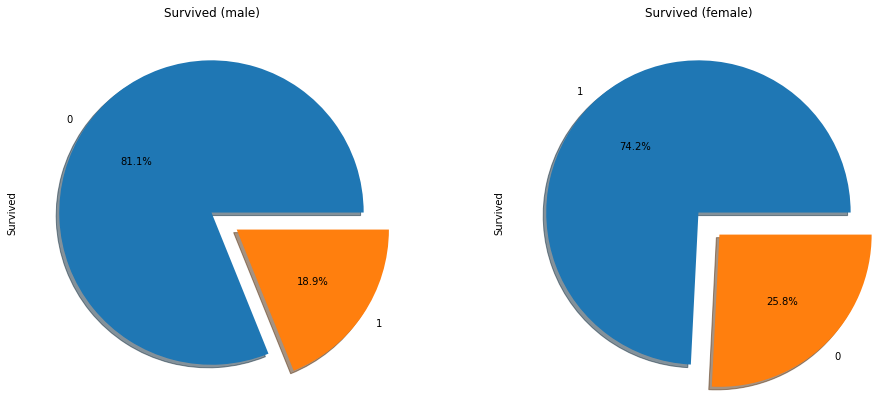

In [96]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

Female had a higher survival rate than male. Since female survival rate is 74.2% where as male is only 18.9%.

Survival rate decreases with Pclass

From the above analysis we can say that the survival rate decreases with Pclass. 

# 3.Embarked and survived:

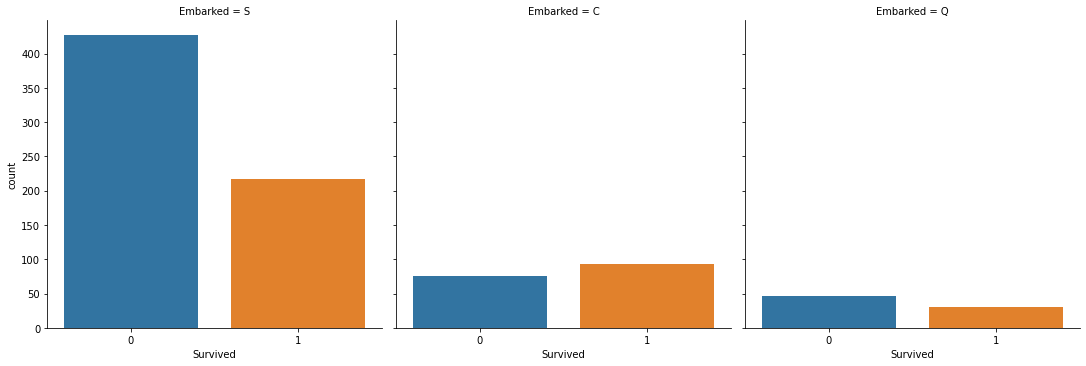

In [97]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df);

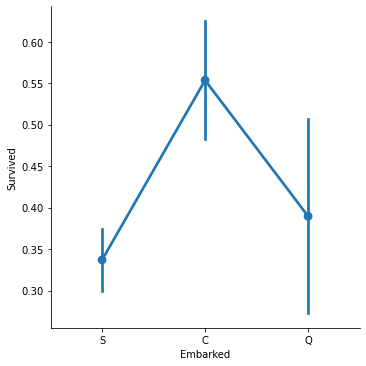

In [98]:
sns.catplot('Embarked','Survived', kind='point', data=df)

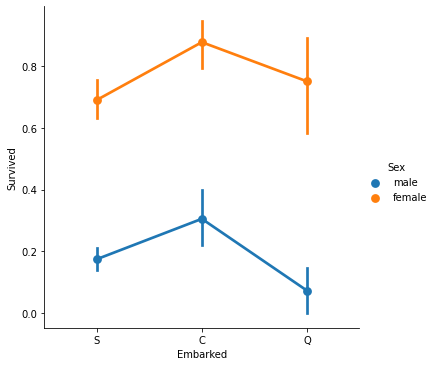

In [99]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=df);

 From this we can say that Survival rate lowest for S and highest for C.

# 4. Embarked, Pclass and Sex:

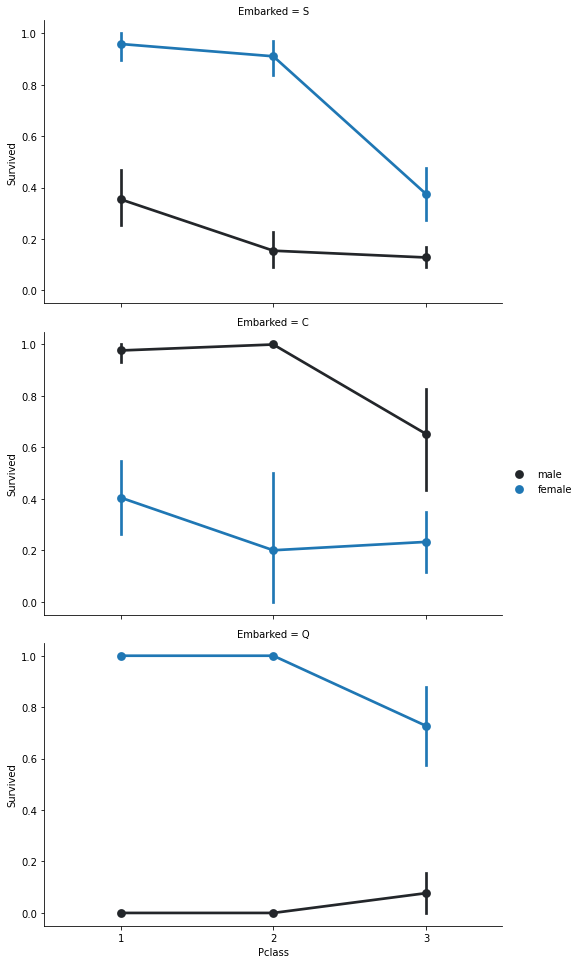

In [100]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

Pclass also seems to be correlated with survival. We will generate another plot of it below.

# 4.Pclass and Survived:

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

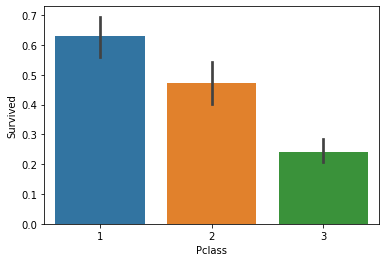

In [101]:
sns.barplot(x='Pclass', y='Survived', data=df)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

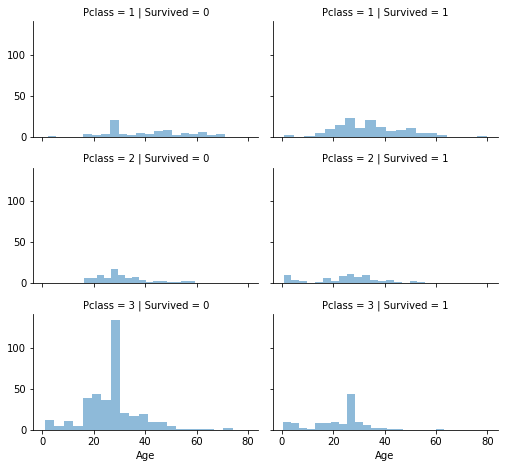

In [102]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [103]:
#analysing the survival percentage of each Pclass
print("% of survivals in") 
print("Pclass=1 : ", df.Survived[df.Pclass == 1].sum()/df[df.Pclass == 1].Survived.count()*100)
print("Pclass=2 : ", df.Survived[df.Pclass == 2].sum()/df[df.Pclass == 2].Survived.count()*100)
print("Pclass=3 : ", df.Survived[df.Pclass == 3].sum()/df[df.Pclass == 3].Survived.count()*100)

% of survivals in
Pclass=1 :  62.96296296296296
Pclass=2 :  47.28260869565217
Pclass=3 :  24.236252545824847


Thus this confirms that our assumption about Pclass1 having more Survival rate is true.

In [104]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

Survival rate decreases with Pclass.

# Correlation:

In [105]:
dfcor=df.corr()
dfcor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


<AxesSubplot:>

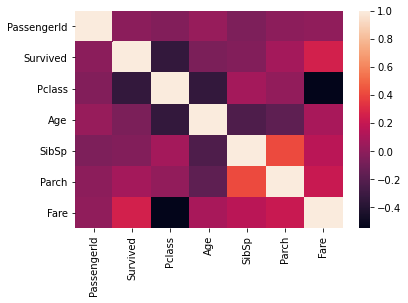

In [106]:
sns.heatmap(dfcor)

The lighter shades have high correlation.

<AxesSubplot:>

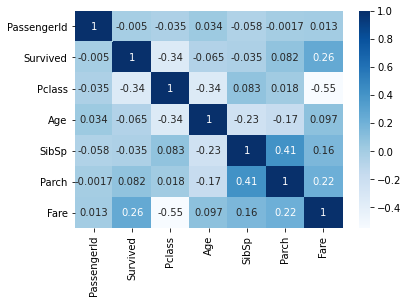

In [107]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

The dark shades are highly negatively correlated.

<AxesSubplot:>

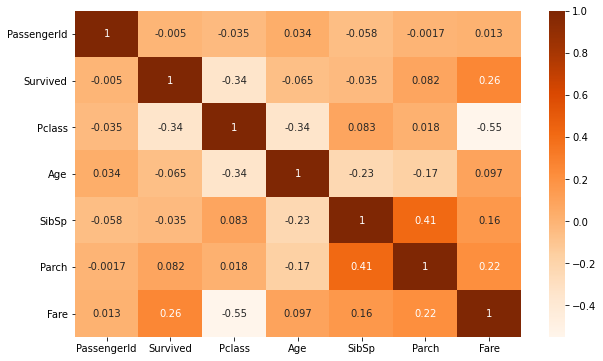

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

We can see that Parch is highly correlated with SibSp.
Pclass is high negatively correlated with Fare and Age.
Survived is negatively correlated with Fare.

# Plotting Ouliers:

In [109]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

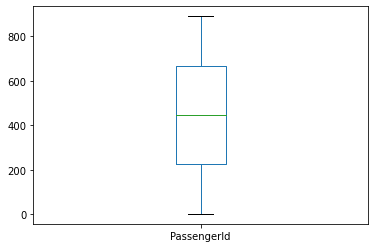

In [110]:
df['PassengerId'].plot.box()

<AxesSubplot:>

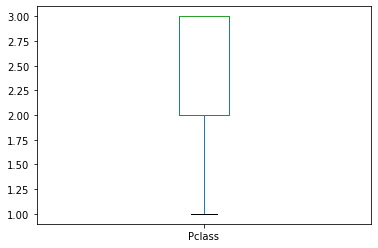

In [111]:
df['Pclass'].plot.box()

<AxesSubplot:>

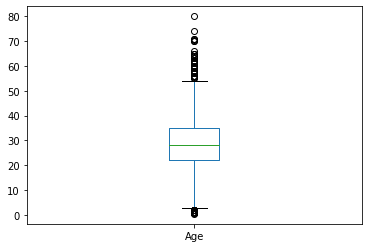

In [112]:
df['Age'].plot.box()

Here we can see there are some ouliers.

<AxesSubplot:>

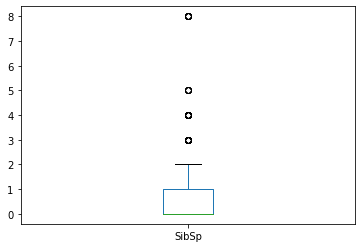

In [113]:
df['SibSp'].plot.box()

Here some Outliers are lying from 3 to 8.

PassengerId       AxesSubplot(0.125,0.125;0.0945122x0.755)
Survived       AxesSubplot(0.238415,0.125;0.0945122x0.755)
Pclass         AxesSubplot(0.351829,0.125;0.0945122x0.755)
Age            AxesSubplot(0.465244,0.125;0.0945122x0.755)
SibSp          AxesSubplot(0.578659,0.125;0.0945122x0.755)
Parch          AxesSubplot(0.692073,0.125;0.0945122x0.755)
Fare           AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

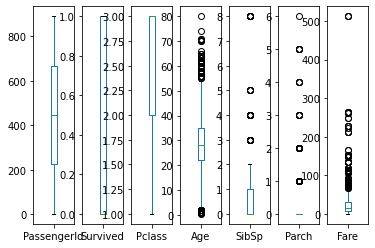

In [114]:
df.plot(kind='box', subplots=True, layout=(1,7))

# Normal Distribution Curve:

<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

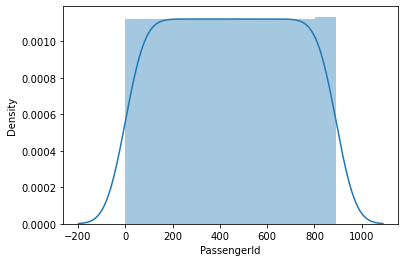

In [115]:
sns.distplot(df['PassengerId'])

Here the data is normally distributed.

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

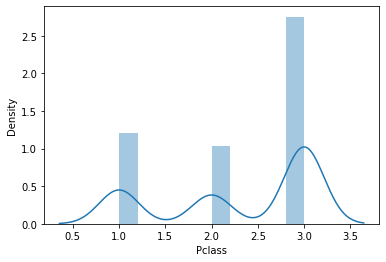

In [116]:
sns.distplot(df['Pclass'])

Here the data is not normally distributed since the building blocks are out of the  normal curve

<AxesSubplot:xlabel='Survived', ylabel='Density'>

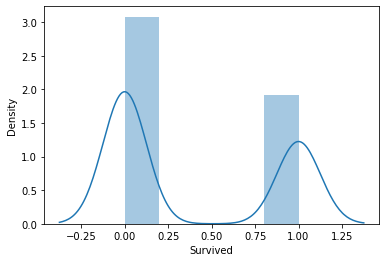

In [117]:
sns.distplot(df['Survived'])

Here the data is not normally distributed since the building blocks are out of the normal curve

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

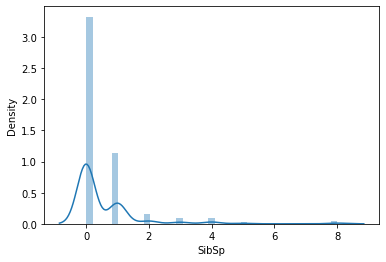

In [118]:
sns.distplot(df['SibSp'])

Here the data is not normally distributed since the building blocks are out of the normal curve and also we can observe the skewness.

<AxesSubplot:xlabel='Parch', ylabel='Density'>

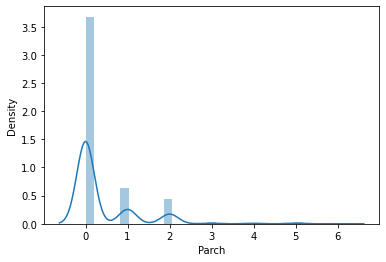

In [119]:
sns.distplot(df['Parch'])

Here the data is not normally distributed since the building blocks are out of the normal curve.

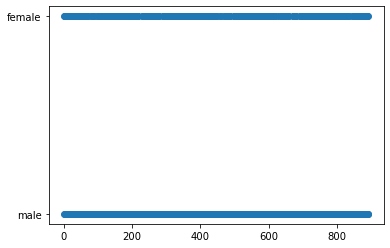

In [120]:
plt.scatter(df['PassengerId'],df['Sex'])

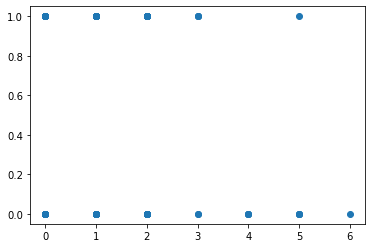

In [121]:
plt.scatter(df['Parch'],df['Survived'])

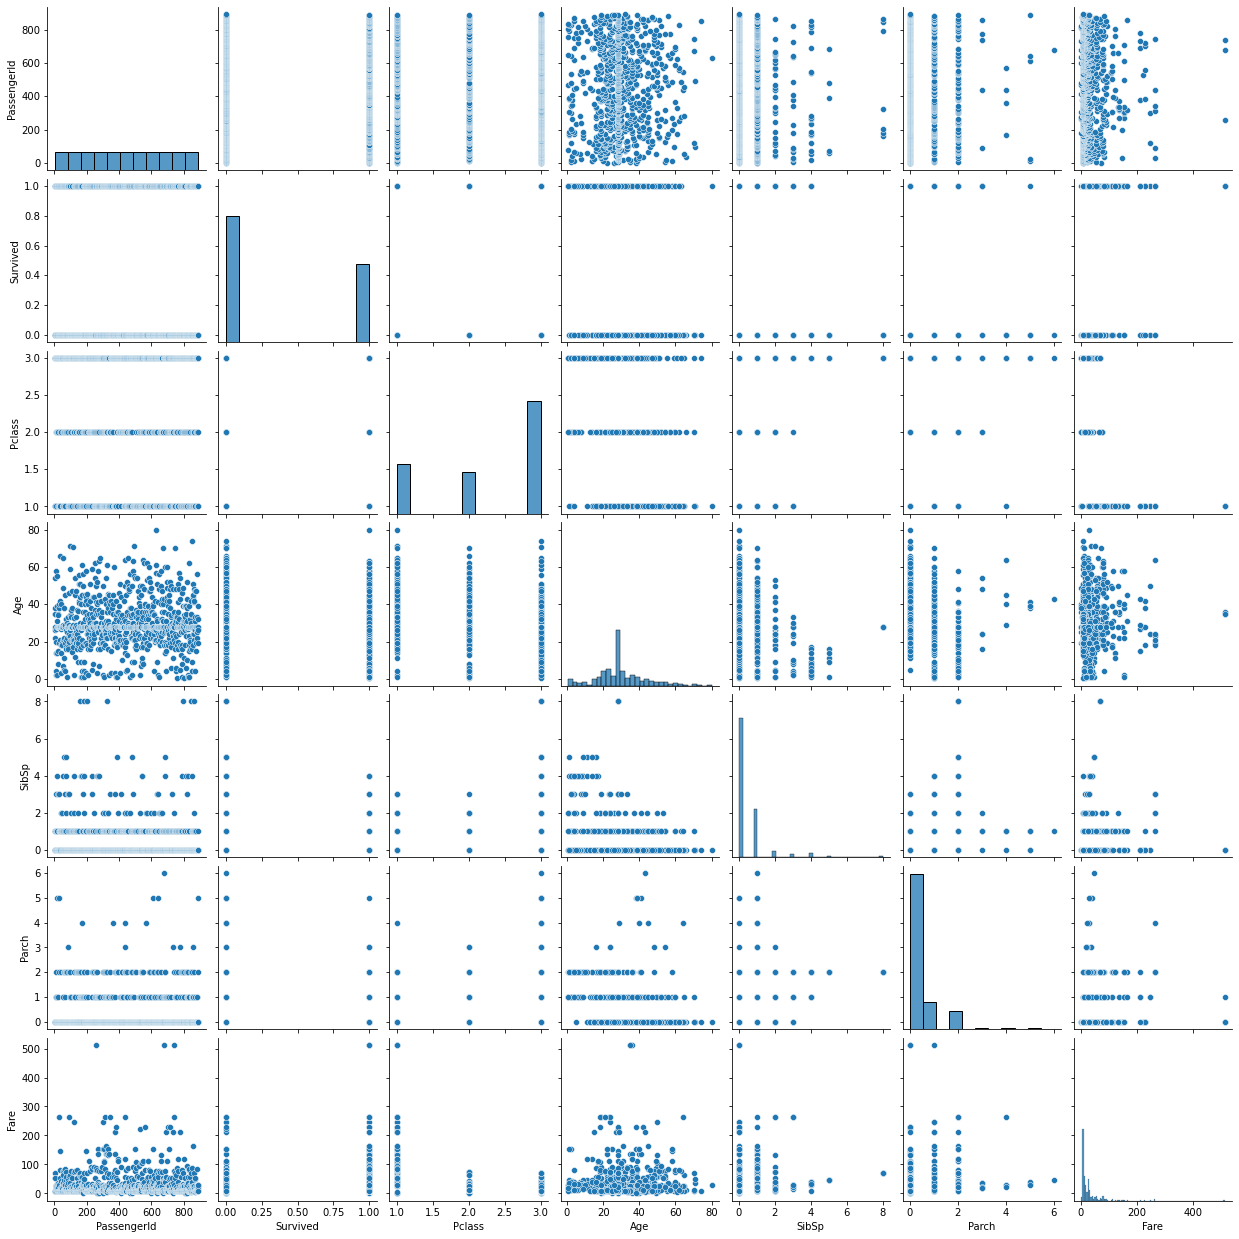

In [122]:
sns.pairplot(df)

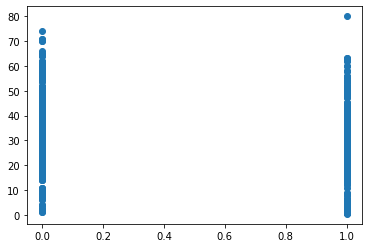

In [123]:
plt.scatter(df['Survived'],df['Age'])

Since Name is not contributing much to our target and also Parch column is having many zeros as its value it is not playing a significant role in contributing to our target we just drop those columns.

In [124]:
df.drop(['Name','Parch'],axis=1,inplace=True)

In [125]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,373450,8.0500,NaN,S


# Converting features:

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


Above we can see that ‘Fare’ is a float and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked. Lets investigate and transfrom one after another.

In [127]:
#converting Fare from float to int datatype
df['Fare'] = df['Fare'].astype(int)
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Ticket          object
Fare             int32
Cabin           object
Embarked        object
dtype: object

In [128]:
#mapping for gender
genders = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(genders)

Name:
We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [129]:
df.drop('Ticket',axis=1,inplace=True)  #since Ticket is not much required 

In [130]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,7,NaN,S
1,2,1,1,1,38.0,1,71,C85,C
2,3,1,3,1,26.0,0,7,NaN,S
3,4,1,1,1,35.0,1,53,C123,S
4,5,0,3,0,35.0,0,8,NaN,S


# Removing Outliers:

In [131]:
#from scipy.stats import zscore
z=np.abs(zscore(df[['PassengerId','Survived','Pclass','Age','SibSp','Fare']]))
z.shape       

(891, 6)

In [132]:
threshold=3
print(np.where(z>3))

(array([ 16,  27,  50,  59,  68,  71,  88,  96, 116, 118, 119, 159, 164,
       171, 180, 182, 201, 233, 258, 261, 266, 278, 299, 311, 324, 341,
       377, 380, 386, 438, 480, 493, 527, 541, 542, 557, 630, 672, 679,
       683, 686, 689, 700, 716, 730, 737, 742, 745, 779, 787, 792, 813,
       824, 846, 850, 851, 863], dtype=int64), array([4, 5, 4, 4, 4, 4, 5, 3, 3, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4,
       5, 5, 4, 5, 5, 5, 4, 5, 4, 3, 5, 4, 4, 5, 3, 3, 5, 4, 4, 5, 5, 5,
       5, 5, 5, 3, 5, 4, 4, 4, 4, 4, 4, 3, 4], dtype=int64))


In [133]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(891, 9)
(834, 9)


# Calculating the loss percent:

In [134]:
loss_percent=(891-834)/891*100
loss_percent

6.397306397306397

since our loss_percent is <10 we can proceed further. 

# Feature Engineering:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

# Label Encoding:

In [137]:
labelencoder=LabelEncoder()
for column in df_new.columns:
    df_new[column]=labelencoder.fit_transform(df_new[column])

In [138]:
df_new.drop('PassengerId',axis=1,inplace=True)

In [139]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,0,2,0,28,1,4,135,2
1,1,0,1,51,1,56,70,0
2,1,2,1,34,0,4,135,2
3,1,0,1,47,1,46,48,2
4,0,2,0,47,0,5,135,2


# Removing skewness:

In [140]:
x=df_new.iloc[:,-7:]
y=df_new.iloc[:,-8:-7]

In [141]:
from sklearn.preprocessing import power_transform
power_transform(x,method='yeo-johnson')             #using 'yeo-johnson' method to remove skewness

array([[ 0.85802432, -0.73399277, -0.64688164, ..., -0.96282903,
         0.49352498,  0.58071216],
       [-1.50805333,  1.36241124,  0.80964673, ...,  1.4993356 ,
        -2.16788526, -1.7810593 ],
       [ 0.85802432,  1.36241124, -0.2473054 , ..., -0.96282903,
         0.49352498,  0.58071216],
       ...,
       [ 0.85802432,  1.36241124, -0.11769666, ...,  0.5418271 ,
         0.49352498,  0.58071216],
       [-1.50805333, -0.73399277, -0.2473054 , ...,  0.82490303,
        -2.28382507, -1.7810593 ],
       [ 0.85802432, -0.73399277,  0.26197259, ..., -0.96282903,
         0.49352498, -1.1987215 ]])

# Splitting the data into training set and testing set.

In [142]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [143]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=150, test_size=0.33)

In [144]:
#printing the shape of train and test sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(558, 7)
(276, 7)
(558, 1)
(276, 1)


# Using classification methods:

# 1. Decision Tree Classifier

In [145]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"at random_state", i)

78.26086956521739 at random_state 0
79.71014492753623 at random_state 1
77.53623188405797 at random_state 2
78.62318840579711 at random_state 3
80.43478260869566 at random_state 4
80.43478260869566 at random_state 5
75.0 at random_state 6
75.0 at random_state 7
76.81159420289855 at random_state 8
80.79710144927536 at random_state 9
76.81159420289855 at random_state 10
75.72463768115942 at random_state 11
76.08695652173914 at random_state 12
80.79710144927536 at random_state 13
73.91304347826086 at random_state 14
78.98550724637681 at random_state 15
79.34782608695652 at random_state 16
76.44927536231883 at random_state 17
78.98550724637681 at random_state 18
78.62318840579711 at random_state 19
77.17391304347827 at random_state 20
79.71014492753623 at random_state 21
80.07246376811594 at random_state 22
80.79710144927536 at random_state 23
75.72463768115942 at random_state 24
76.81159420289855 at random_state 25
75.36231884057972 at random_state 26
76.44927536231883 at random_state 27


In [146]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=179)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print("Best accuracy is",maxAccu," on Random_state",maxRS)

Best accuracy is 0.8685258964143426  on Random_state 1


In [147]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.90      0.88      0.89       160
           1       0.79      0.82      0.81        91

    accuracy                           0.86       251
   macro avg       0.84      0.85      0.85       251
weighted avg       0.86      0.86      0.86       251

Test Accuracy:85.66%


# Confusion Matrix:

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

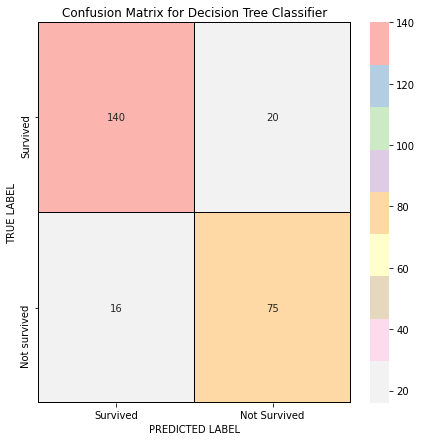

In [148]:
cm = confusion_matrix(y_test,y_pred_dt)
x_axis_labels = ["Survived","Not Survived"]
y_axis_labels = ["Survived","Not survived"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel1_r", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

# 2.Logistic Regression:

In [149]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier: \n\n",classification_report(y_test,y_pred_lr))
print("Test Accuracy:{}%".format(round(lr.score(x_test,y_test)*100,2)))

Logistic Regression Classifier: 

               precision    recall  f1-score   support

           0       0.85      0.86      0.86       160
           1       0.75      0.74      0.74        91

    accuracy                           0.82       251
   macro avg       0.80      0.80      0.80       251
weighted avg       0.82      0.82      0.82       251

Test Accuracy:81.67%


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

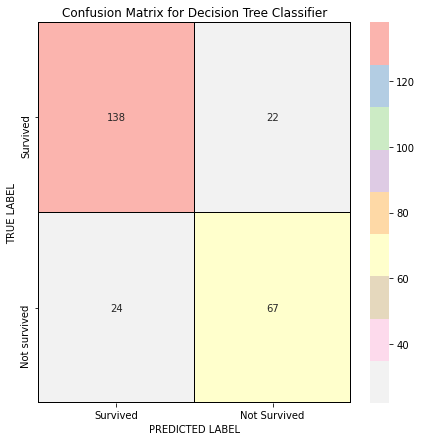

In [150]:
cm = confusion_matrix(y_test,y_pred_lr)
x_axis_labels = ["Survived","Not Survived"]
y_axis_labels = ["Survived","Not survived"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel1_r", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

# 3.KNearestNeighbors Classifier:

In [151]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
                                best_score = knn.score(x_train, y_train)
                                best_Kvalue = i
    print("Best KNN Value:{}".format(best_Kvalue )) 
    print("Test Accuarcy:{}".format(round(best_score*100,2)))

Best KNN Value:1
Test Accuarcy:96.05
Best KNN Value:1
Test Accuarcy:96.05
Best KNN Value:1
Test Accuarcy:96.05
Best KNN Value:1
Test Accuarcy:96.05
Best KNN Value:1
Test Accuarcy:96.05
Best KNN Value:1
Test Accuarcy:96.05
Best KNN Value:1
Test Accuarcy:96.05
Best KNN Value:1
Test Accuarcy:96.05
Best KNN Value:1
Test Accuarcy:96.05


In [152]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(" KNN Classifier: \n\n",classification_report(y_test,y_pred_knn))
print("Test Accuracy:{}%".format(round(knn.score(x_test,y_test)*100,2)))

 KNN Classifier: 

               precision    recall  f1-score   support

           0       0.77      0.81      0.79       160
           1       0.63      0.57      0.60        91

    accuracy                           0.72       251
   macro avg       0.70      0.69      0.69       251
weighted avg       0.72      0.72      0.72       251

Test Accuracy:72.11%


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

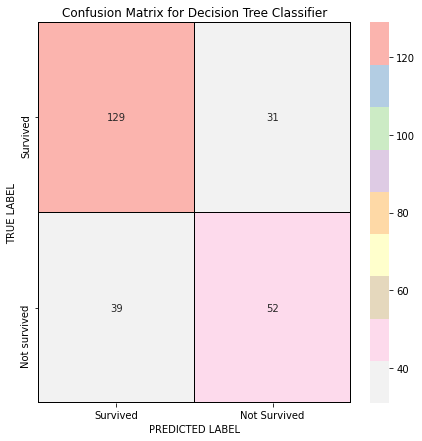

In [153]:
cm = confusion_matrix(y_test,y_pred_knn)
x_axis_labels = ["Survived","Not Survived"]
y_axis_labels = ["Survived","Not survived"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel1_r", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

# 4.Support vector classifier:

In [154]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print(" SVM Classifier: \n\n",classification_report(y_test,y_pred_svm))
print("Test Accuracy:{}%".format(round(svm.score(x_test,y_test)*100,2)))

 SVM Classifier: 

               precision    recall  f1-score   support

           0       0.72      0.88      0.79       160
           1       0.65      0.41      0.50        91

    accuracy                           0.71       251
   macro avg       0.69      0.64      0.65       251
weighted avg       0.70      0.71      0.69       251

Test Accuracy:70.52%


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

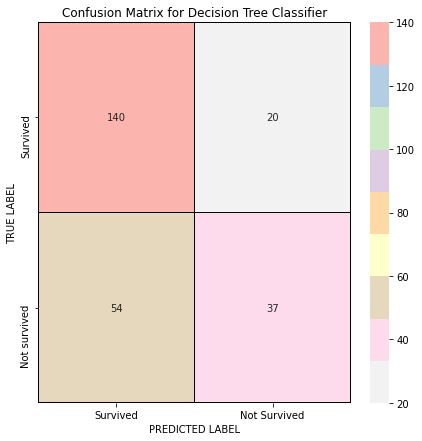

In [155]:
cm = confusion_matrix(y_test,y_pred_svm)
x_axis_labels = ["Survived","Not Survived"]
y_axis_labels = ["Survived","Not survived"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel1_r", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

# 5.GaussianNB:

In [156]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print(" Navie byes Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))

 Navie byes Classifier: 

               precision    recall  f1-score   support

           0       0.83      0.85      0.84       160
           1       0.72      0.69      0.71        91

    accuracy                           0.79       251
   macro avg       0.78      0.77      0.77       251
weighted avg       0.79      0.79      0.79       251

Test Accuracy:79.28%


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

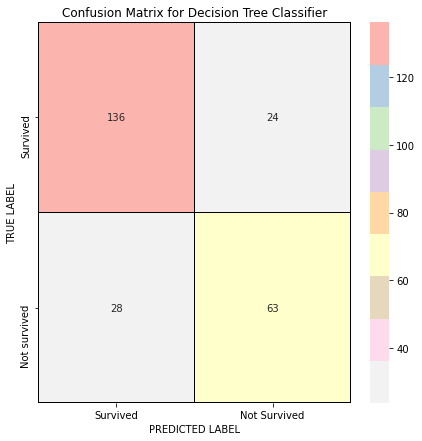

In [157]:
cm = confusion_matrix(y_test,y_pred_nb)
x_axis_labels = ["Survived","Not Survived"]
y_axis_labels = ["Survived","Not survived"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel1_r", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

# 6.Random Forest Classifier:

In [158]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.89      0.90      0.90       160
           1       0.82      0.81      0.82        91

    accuracy                           0.87       251
   macro avg       0.86      0.86      0.86       251
weighted avg       0.87      0.87      0.87       251

Test Accuracy:86.85%


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

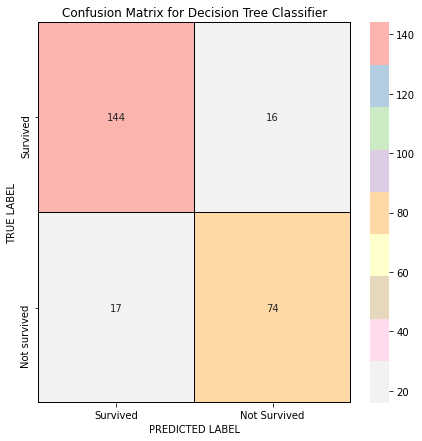

In [159]:
cm = confusion_matrix(y_test,y_pred_rf)
x_axis_labels = ["Survived","Not Survived"]
y_axis_labels = ["Survived","Not survived"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel1_r", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

# Cross validation score:

In [160]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.7950075752110237


In [161]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.7877786595483732


In [162]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.7159223721232234


In [163]:
print(cross_val_score(svm,x,y,cv=5).mean())

0.6835004689416347


In [164]:
print(cross_val_score(nb,x,y,cv=5).mean())

0.7494408772815814


In [165]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.8129860760406897


We can see that the difference of cross validation score and accuracy score of Random forest classifier is low so we will consider the Random forest as our best classifier for the present model.

# Hyper Parameter tuning:

In [179]:
#using gridsearch
from sklearn.model_selection import GridSearchCV

In [171]:
#we are tuning three hyperparameters  right now, we are passing different values for both parameters
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(2,20,3),
    'min_samples_leaf':range(1,10,2),
    'min_samples_split':range(2,10,2),
}

In [172]:
grid_search=GridSearchCV(estimator=rf,            #since rf is considered as best for this model
                         param_grid=grid_param, 
                         cv=5,
                         n_jobs=-1)

In [173]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [174]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [175]:
grid_search.best_score_

0.8180371352785146

Testing new parameters:

In [177]:
clf=RandomForestClassifier(criterion='gini',max_depth=5, min_samples_leaf=1, min_samples_split=4)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=4)

In [178]:
clf.score(x_test,y_test)

0.852589641434263

Great! Our cross-validation score is improved from 81.29% to 85.25% with the Grid search CV model compared with our baseline model. That is a 3.96% improvement.

Now that we have a proper model, we can start evaluating it’s performace in a more accurate way. 

# Further Evaluation:

In [181]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(clf, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[296,  54],
       [ 67, 166]], dtype=int64)

The first row is about the not-survived-predictions: 296 passengers were correctly classified as not survived (called true negatives) and 54 where wrongly classified as not survived (false positives).
The second row is about the survived-predictions: 67 passengers where wrongly classified as survived (false negatives) and 166 where correctly classified as survived (true positives).
A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

# Precision and Recall:

In [183]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7545454545454545
Recall: 0.7124463519313304


Our model predicts 76% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 72 % of the people who actually survived.

# F-score:

In [184]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7328918322295804

There we have it, a 73 % F-score. The score is not that high, because we have a recall of 72%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff. 

# Precision - Recall curve:

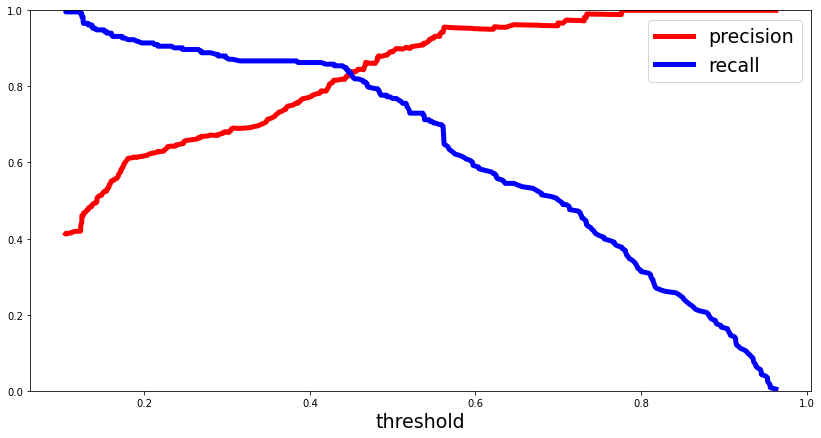

In [186]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y1_scores = clf.predict_proba(x_train)
y1_scores = y1_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y1_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above we can clearly see that the recall is falling of rapidly at a precision of around 81%. Because of that we may want to select the precision/recall tradeoff before that — maybe at around 75 %.
we are now able to choose a threshold, that gives the best precision/recall tradeoff for our current machine learning problem. we can see that we would need a threshold of around 0.4. Then we could train a model with exactly that threshold and would get the desired accuracy.

# AUC ROC Curve:

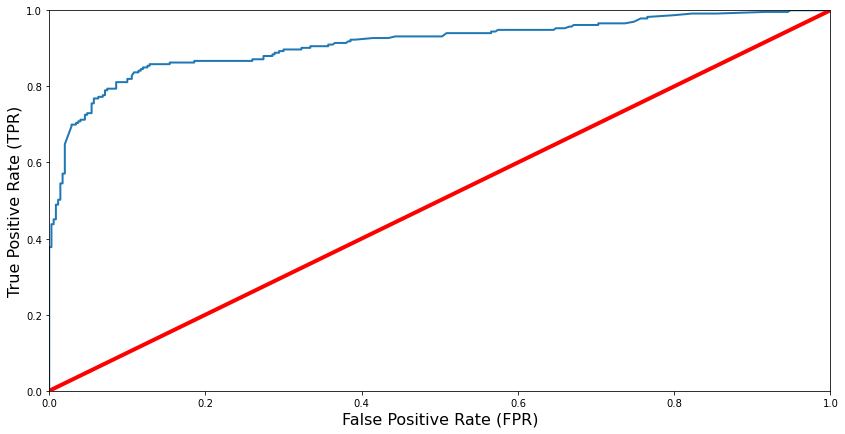

In [187]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y1_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely random classifier and therefore our classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.
Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

# AUC ROC score:

In [188]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y1_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.912280809319436


Nice ! I think that score is good enough.

# Evaluate the model:

In [189]:
Final_mod = RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

88.04780876494024


# Saving the model:

In [190]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

# Conclusion:

In [192]:
preds = rf.predict(x_test)
dataframe=pd.DataFrame({})
dataframe['Predicted survival']=preds
dataframe['Actual survival']=y_test.values
print(dataframe)

     Predicted survival  Actual survival
0                     0                0
1                     1                1
2                     1                1
3                     1                0
4                     1                0
..                  ...              ...
246                   1                1
247                   0                0
248                   1                1
249                   1                1
250                   1                0

[251 rows x 2 columns]


The train and test data is balanced most classification methods hit the 88% accuracy with the datset.